A partir de las observaciones en datos2D.dat calcule el ajuste polinomial por medio de mínimos cuadrados. Es decir, plantee y resuelva el problema en la forma:

                                                Am=g
 
Escriba las matrices/vectores involucrados,  A,m y g.

In [1]:
#!pip3 install sympy 

# aunque lo instalaba no lo encontraba al importarlo. lo busco específicamente en la carpeta 
# que está instalada(lo dice al correr el install) usando 'sys'

import sys
sys.path.append(r'c:\users\cari_\miniconda3\lib\site-packages') #PUEDO PONER 'r' ANTES O PONER '/' EN VEZ DE '\'

import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


datos2D_A.dat es un archivo con los siguientes datos delimitados por comas.

| $ \quad X \ [km] $ | $ \quad Y \ [km] $ | $AB \ [mGal] $ |
|:------------------:|:------------------:|:---------------|
| $ \quad 0 $        | $ \quad 0 $        | $ \quad 8.36 $ |
| $ \quad 1 $        | $ \quad 0 $        | $ \quad 8.46 $ |
| $ \quad ... $      | $ \quad ... $      | $ \quad ... $  |

## Representación de los datos

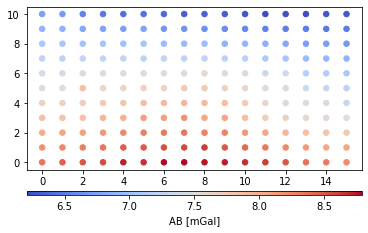

In [2]:
# cargo los datos generando una matriz de 3 columnas y tantas filas como cantidad de datos de AB tenga

datos   = np.genfromtxt("datos2D_A.dat",delimiter=",")  

plt.scatter(datos[:,0],datos[:,1],c=datos[:,2],s=30,cmap="coolwarm")
plt.colorbar(label="AB [mGal]", pad=0.1, aspect=100, orientation="horizontal")

## Ajuste polinomial  por medio de Mínimos Cuadrados

\begin{equation}      z_i= \beta_0 + \beta_1 x_i + \beta_2 y_i + \beta_3 x_i^2 + \beta_4 x_i y_i + \beta_5 y_i^2 + \cdots+ \beta_{[(m+1) (m+2)/2]-2} x_i y_i^{m-1} + \beta_{[(m+1) (m+2)/2]-1} y_i^m  \\ \ \\ Z=X\beta   \end{equation} 

Donde $z_i$ son los datos que quiero ajustara un polinomio y los $\beta$ los coeficientes de dicho polinomio y nuestras incógnitas.

\begin{equation}
    \begin{bmatrix} 
        z_1 \\
        z_2 \\
        z_3 \\
        \vdots \\
        z_n 
    \end{bmatrix}   
    =
    \begin{bmatrix} 
        1 & x_1 & y_1 & x_1^2 & x_1 y_1 & y_1^2 & \dots & x_1 y_1^{m-1} & y_1^m \\
        1 & x_2 & y_2 & x_2^2 & x_2 y_2 & y_2^2 & \dots & x_2 y_2^{m-1} & y_2^m \\ 
        1 & x_3 & y_3 & x_3^2 & x_3 y_3 & y_3^2 & \dots & x_3 y_3^{m-1} & y_3^m \\ 
        \vdots & \vdots & \vdots & \vdots& \vdots & \vdots & \ddots & \vdots & \vdots \\ 
        1 & x_n & y_n & x_n^2 & x_n y_n & y_n^2 & \dots & x_n y_n^{m-1} & y_n^m 
    \end{bmatrix} 
    %
    \begin{bmatrix} 
        \beta_0\\ 
        \beta_1\\ 
        \beta_2\\ 
        \vdots \\ 
        \beta_{[(m+1) (m+2)/2]-1} 
    \end{bmatrix}
\end{equation}

\begin{equation} \beta = (X^tX)^{-1}X^t Y
\end{equation}

En nuestro caso, según consigna, Z==g, $\beta\$==m y X==A.

GRADO CERO: 

$z_i= \beta_0=1*\beta_0$

\begin{equation}
    \begin{bmatrix} 
        z_1 \\
        z_2 \\
        z_3 \\
        \vdots \\
        z_n 
    \end{bmatrix}   
    =
    \begin{bmatrix} 
        1 \\
        1 \\ 
        1 \\ 
        \vdots \\ 
        1 
    \end{bmatrix} 
    %
    \begin{bmatrix} 
        \beta_0
    \end{bmatrix}
\end{equation}

[[7.51948864]]


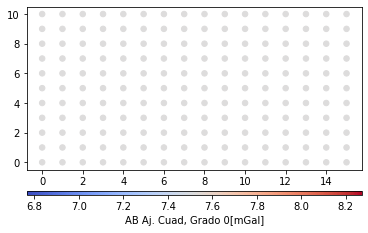

In [3]:
f       = len(datos[:,1])       # cantidad de filas

A       = np.ones((f,1))        # matriz de unos de m filas y 1 columna
 
g       = np.zeros((f,1))       # inicializo g como matriz de ceros de m filas y 1 columna

g[:,0]  = datos[:,2]            # le asigno los valores de AB

aux1    = np.transpose(A) @ A   # multiplicación de matrices

aux2    = np.transpose(A) @ g

m       = aux2 / aux1           # divido por aux1 xq es una constante y yo quiero la inversa que es 1/aux1

print(m)

G0      = A @ m

plt.scatter(datos[:,0],datos[:,1],c=G0,s=30,cmap="coolwarm")
plt.colorbar(label="AB Aj. Cuad, Grado 0[mGal]", pad=0.1, aspect=100, orientation="horizontal")

GRADO UNO:

$y_i= \beta_0 + \beta_1 x_i + \beta_2 y_i $

\begin{equation}
    \begin{bmatrix} 
        y_1 \\
        y_2 \\
        y_3 \\
        \vdots \\
        y_n 
    \end{bmatrix}   
    =
    \begin{bmatrix} 
        1 & x_1 & y_1 \\
        1 & x_2 & y_2 \\ 
        1 & x_3 & y_3 \\ 
        \vdots & \vdots & \vdots \\ 
        1 & x_n & y_n
    \end{bmatrix} 
    %
    \begin{bmatrix} 
        \beta_0\\ 
        \beta_1\\ 
        \beta_2
    \end{bmatrix}
\end{equation}

[[ 8.73455381]
 [-0.02206551]
 [-0.20991477]]


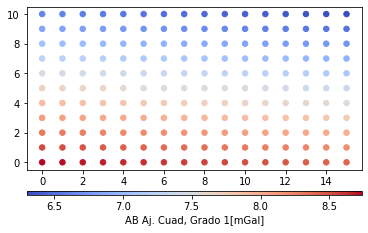

In [4]:
A      = np.ones((f,3))
A[:,1] = datos[:,0] 
A[:,2] = datos[:,1] 

aux1   = np.linalg.inv (np.transpose(A) @ A)   # multiplicación de matrices

aux2   = np.transpose(A) @ g

m      = aux1 @ aux2 

print(m)


G1     = A@m          # me da mis nuevos valores de g a partir del ajuste de grado 1


plt.scatter(datos[:,0],datos[:,1],c=G1,s=30,cmap="coolwarm")
plt.colorbar(label="AB Aj. Cuad, Grado 1[mGal]", pad=0.1, aspect=100, orientation="horizontal")


GRADO DOS

$y_i= \beta_0 + \beta_1 x_i + \beta_2 y_i + \beta_3 x_i^2 + \beta_4 x_i y_i + \beta_5 y_i^2 $

\begin{equation}
    \begin{bmatrix} 
        y_1 \\
        y_2 \\
        y_3 \\
        \vdots \\
        y_n 
    \end{bmatrix}   
    =
    \begin{bmatrix} 
        1 & x_1 & y_1 & x_1^2 & x_1 y_1 & y_1^2 \\
        1 & x_2 & y_2 & x_2^2 & x_2 y_2 & y_2^2 \\ 
        1 & x_3 & y_3 & x_3^2 & x_3 y_3 & y_3^2 \\ 
        \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ 
        1 & x_n & y_n & x_n^2 & x_n y_n & y_n^2 
    \end{bmatrix} 
    %
    \begin{bmatrix} 
        \beta_0\\ 
        \beta_1\\ 
        \beta_2\\
        \beta_3\\
        \beta_4\\
        \beta_5
    \end{bmatrix}
\end{equation}

[[ 8.46314930e+00]
 [ 5.71648205e-02]
 [-1.66620475e-01]
 [-4.78848358e-03]
 [-1.48061497e-03]
 [-3.21896853e-03]]


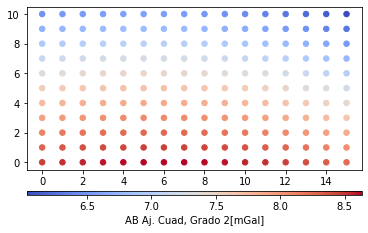

In [5]:
A      = np.ones((f,6))
A[:,1] = datos[:,0] 
A[:,2] = datos[:,1]
A[:,3] = datos[:,0]**2
A[:,4] = datos[:,0]*datos[:,1]
A[:,5] = datos[:,1]**2

aux1   = np.linalg.inv (np.transpose(A) @ A)   # multiplicación de matrices

aux2   = np.transpose(A) @ g

m      = aux1 @ aux2 

print(m)


G2     = A@m          # me da mis nuevos valores de g a partir del ajuste de grado 1


plt.scatter(datos[:,0],datos[:,1],c=G2,s=30,cmap="coolwarm")
plt.colorbar(label="AB Aj. Cuad, Grado 2[mGal]", pad=0.1, aspect=100, orientation="horizontal")

GRADO TRES

$y_i= \beta_0 + \beta_1 x_i + \beta_2 y_i + \beta_3 x_i^2 + \beta_4 x_i y_i + \beta_5 y_i^2 + \beta_6 x_i^3 + \beta_7 x_i^2 y_i + \beta_8 x_i y_i^2 + \beta_9 y_i^3 $

\begin{equation}
    \begin{bmatrix} 
        y_1 \\
        y_2 \\
        y_3 \\
        \vdots \\
        y_n 
    \end{bmatrix}   
    =
    \begin{bmatrix} 
        1 & x_1 & y_1 & x_1^2 & x_1 y_1 & y_1^2 & x_1^3 & x_1^2 y_1 & x_1 y_1^2 & y_1^3 \\
        1 & x_2 & y_2 & x_2^2 & x_2 y_2 & y_2^2 & x_2^3 & x_2^2 y_2 & x_2 y_2^2 & y_2^3 \\ 
        1 & x_3 & y_3 & x_3^2 & x_3 y_3 & y_3^2 & x_3^3 & x_3^2 y_3 & x_3 y_3^2 & y_3^3 \\ 
        \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ 
        1 & x_n & y_n & x_n^2 & x_n y_n & y_n^2 & x_n^3 & x_n^2 y_n & x_n y_n^2 & y_n^3  
    \end{bmatrix} 
    %
    \begin{bmatrix} 
        \beta_0\\ 
        \beta_1\\ 
        \beta_2\\
        \beta_3\\
        \beta_4\\
        \beta_5\\
        \beta_6\\
        \beta_7\\
        \beta_8\\
        \beta_9
    \end{bmatrix}
\end{equation}

[[ 8.29442122e+00]
 [ 1.46935709e-01]
 [-1.95605989e-01]
 [-1.08130224e-02]
 [-2.02172276e-02]
 [ 1.68636021e-02]
 [ 1.50799493e-05]
 [ 1.13704800e-03]
 [ 1.68089264e-04]
 [-1.42288267e-03]]


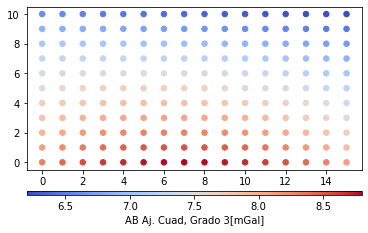

In [6]:
A      = np.ones((f,10))
A[:,1] = datos[:,0] 
A[:,2] = datos[:,1]
A[:,3] = datos[:,0]**2
A[:,4] = datos[:,0]*datos[:,1]
A[:,5] = datos[:,1]**2
A[:,6] = datos[:,0]**3
A[:,7] = [datos[:,0]**2]*datos[:,1]
A[:,8] = datos[:,0]*[datos[:,1]**2]
A[:,9] = datos[:,1]**3

aux1   = np.linalg.inv (np.transpose(A) @ A)   # multiplicación de matrices

aux2   = np.transpose(A) @ g

m      = aux1 @ aux2 

print(m)


G3     = A@m          # me da mis nuevos valores de g a partir del ajuste de grado 1


plt.scatter(datos[:,0],datos[:,1],c=G3,s=30,cmap="coolwarm")
plt.colorbar(label="AB Aj. Cuad, Grado 3[mGal]", pad=0.1, aspect=100, orientation="horizontal")

In [7]:
print(g[5,0],G0[5,0],G1[5,0],G2[5,0],G3[5,0])

print(g[105,0],G0[105,0],G1[105,0],G2[105,0],G3[105,0])

8.67 7.5194886363636355 8.62422627005348 8.629261308544333 8.760659193425084
7.52 7.5194886363636355 7.276475601604279 7.394206583857284 7.393428102406046


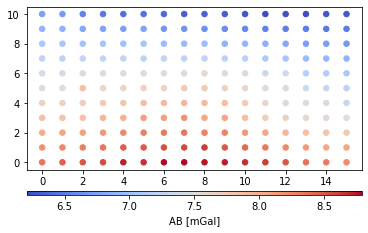

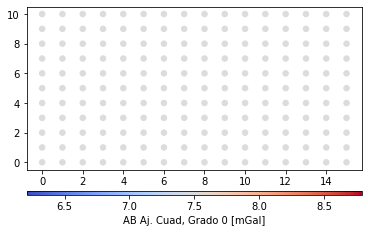

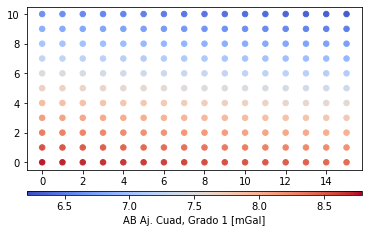

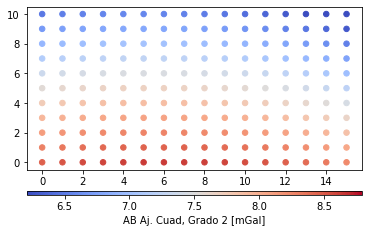

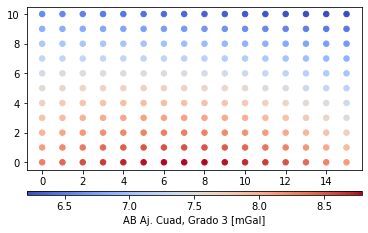

In [8]:
plt.figure(1)
plt.scatter(datos[:,0],datos[:,1],c=g[:,0],s=30,cmap="coolwarm")
plt.colorbar(label="AB [mGal]", pad=0.1, aspect=100, orientation="horizontal")
plt.clim(np.min(g[:,0]),np.max(g[:,0]))
    
plt.figure(2)
plt.scatter(datos[:,0],datos[:,1],c=G0,s=30,cmap="coolwarm")
plt.colorbar(label="AB Aj. Cuad, Grado 0 [mGal]", pad=0.1, aspect=100, orientation="horizontal")
plt.clim(np.min(g[:,0]),np.max(g[:,0]))

plt.figure(3)
plt.scatter(datos[:,0],datos[:,1],c=G1,s=30,cmap="coolwarm")
plt.colorbar(label="AB Aj. Cuad, Grado 1 [mGal]", pad=0.1, aspect=100, orientation="horizontal")
plt.clim(np.min(g[:,0]),np.max(g[:,0]))

plt.figure(4)
plt.scatter(datos[:,0],datos[:,1],c=G2,s=30,cmap="coolwarm")
plt.colorbar(label="AB Aj. Cuad, Grado 2 [mGal]", pad=0.1, aspect=100, orientation="horizontal")
plt.clim(np.min(g[:,0]),np.max(g[:,0]))

plt.figure(5)
plt.scatter(datos[:,0],datos[:,1],c=G3,s=30,cmap="coolwarm")
plt.colorbar(label="AB Aj. Cuad, Grado 3 [mGal]", pad=0.1, aspect=100, orientation="horizontal")
plt.clim(np.min(g[:,0]),np.max(g[:,0]))

In [9]:
#%pip install ipympl

# tengo que correrlo antes de la gráfica que quiera manipular con mouse

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# para poder manipular la gráfica con el mouse:

%matplotlib widget                         

import numpy as np

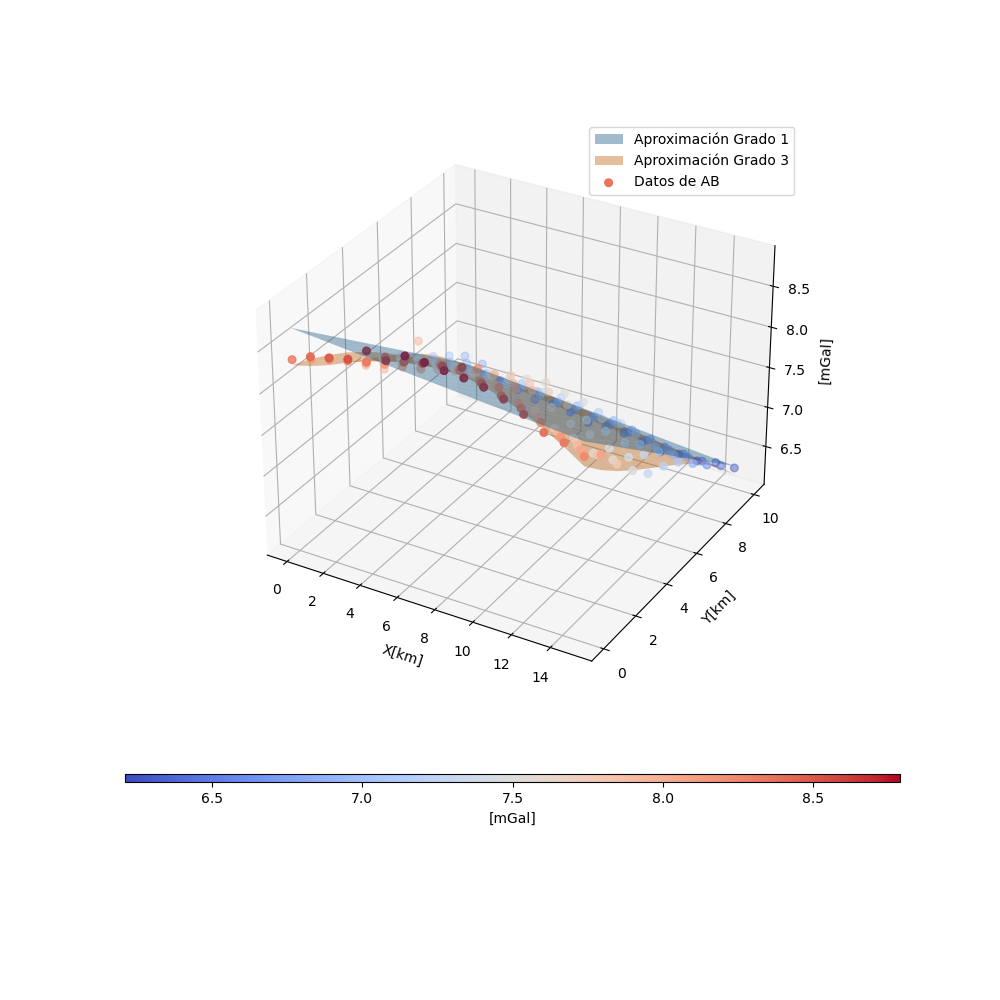

In [10]:
# quiero generar una superficie xq es la ventaja de tener una aproximación polinómica

##sy.plotting.plot3d(G1[:,0],datos[:,0],datos[:,1])  ## SE USA PARA FUNCIONES DE X,Y => PLOT3D(F(X,Y),X,Y)


x,y   = np.meshgrid(np.unique(datos[:,0]),np.unique(datos[:,1]))  # quiero generar una grilla



ArrayG0 = np.array(G0[:,0].T)    # transpongo para pasar de vector columna a fila

p0       = ArrayG0.reshape(len(np.unique(datos[:,1])),len(np.unique(datos[:,0])))  # paso de un vector de datos a una matriz (como scatter)


# reshape pide (#filas, #columnas), pero meshgrid si entro (x,y) me devuelve una matriz de #filas=#datosY, #columnas=#datosX
# entonces en este caso para reshape las filas son segun Y y las columnas segun X



ArrayG1 = np.array(G1[:,0].T)    # transpongo para pasar de vector columna a fila

p1       = ArrayG1.reshape(len(np.unique(datos[:,1])),len(np.unique(datos[:,0])))  # paso de un vector de datos a una matriz (como scatter)



ArrayG2 = np.array(G2[:,0].T)    # transpongo para pasar de vector columna a fila

p2       = ArrayG2.reshape(len(np.unique(datos[:,1])),len(np.unique(datos[:,0])))  # paso de un vector de datos a una matriz (como scatter)



ArrayG3 = np.array(G3[:,0].T)    # transpongo para pasar de vector columna a fila

p3       = ArrayG3.reshape(len(np.unique(datos[:,1])),len(np.unique(datos[:,0])))  # paso de un vector de datos a una matriz (como scatter)





fig=plt.figure(1,figsize=(10,10))
ax = fig.add_subplot(projection='3d')

#c0=ax.plot_surface(x,y,p0,rstride=1,cstride=1,alpha=0.4, label='Aproximación Grado 0') # alpha = transparencia
#c0._facecolors2d=c0._facecolor3d                            # tengo que definir face/edgecolor2d para que imprima los labels, sino salta error
#c0._edgecolors2d=c0._edgecolor3d

c1=ax.plot_surface(x,y,p1,rstride=1,cstride=1,alpha=0.4, label='Aproximación Grado 1')
c1._facecolors2d=c1._facecolor3d
c1._edgecolors2d=c1._edgecolor3d

#c2=ax.plot_surface(x,y,p2,rstride=1,cstride=1,alpha=0.4, label='Aproximación Grado 2')
#c2._facecolors2d=c2._facecolor3d
#c2._edgecolors2d=c2._edgecolor3d

c3=ax.plot_surface(x,y,p3,rstride=1,cstride=1,alpha=0.4, label='Aproximación Grado 3')
c3._facecolors2d=c3._facecolor3d
c3._edgecolors2d=c3._edgecolor3d

c4=ax.scatter(datos[:,0],datos[:,1],g[:,0], c=g[:,0],s=30,cmap="coolwarm", label='Datos de AB')

plt.colorbar(c4,label="[mGal]", pad=0.1, aspect=100, orientation="horizontal")

ax.set_xlabel('X[km]')
ax.set_ylabel('Y[km]')
ax.set_zlabel('[mGal]')

ax.legend()             # para que imprima labels
plt.show()



